# Basic Programming

In [103]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

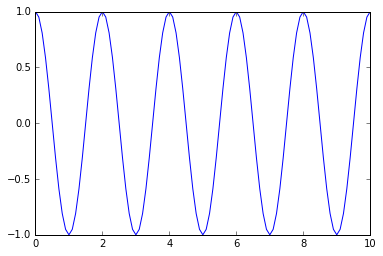

In [104]:
#1

# Generating a time vector from 0 to 10 seconds with an interval of 0.1 second
t = np.arange(0, 10.1, 0.1)

# Generating the cosine
def f(t):
    return np.cos(np.pi * t)

plt.plot(t, f(t))
plt.show()

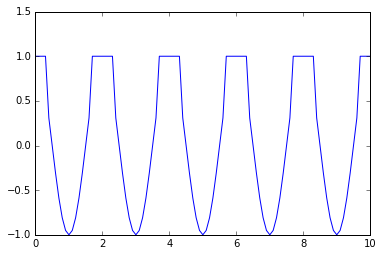

In [105]:
y = []

# Replacing the values above 0.5 by 1
for i in range(len(t)):
    y.append(f(t[i]))
    if y[i] > 0.5:
        y[i] = 1.0

ax = plt.subplot(1,1,1)
ax.set_ylim([-1,1.5])
plt.plot(t, y)
plt.show()

In [106]:
#2

# Initial values for the Fibonacci sequence
F = [1,1]

# Calculating the first 30 Fibonacci numbers
for i in range(2, 30):
    F.append(F[i-2] + F[i-1])
    
print "The first 30 Fibonacci numbers are: ", (F)

primes = []

# Calculate the prime numbers
for x in F:
    for i in range(2,x):
        if (x % i) == 0:
            break
    else:
        primes.append(x)

print "The prime numbers within the first 30 Fibonacci numbers are: ", (primes)
print "The number of prime numbers within the first 30 Fibonacci numbers are: ", (len(primes))

The first 30 Fibonacci numbers are:  [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040]
The prime numbers within the first 30 Fibonacci numbers are:  [1, 1, 2, 3, 5, 13, 89, 233, 1597, 28657, 514229]
The number of prime numbers within the first 30 Fibonacci numbers are:  11


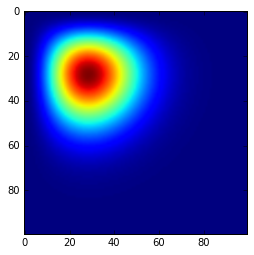

In [107]:
#3a

# Defining the PDF which is given
def PDF(x,y):
    f = (1/(32 * np.pi)) * ((x*y)**2) * (np.e**(-(x**2+y**2)/8))
    return f

# Generating the variables and a grid x, y
x = np.arange(0, 10, 0.1)
y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(x, y)


plt.imshow(PDF(X,Y))
plt.show()


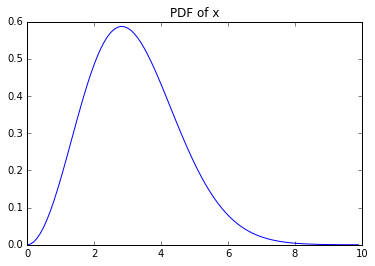

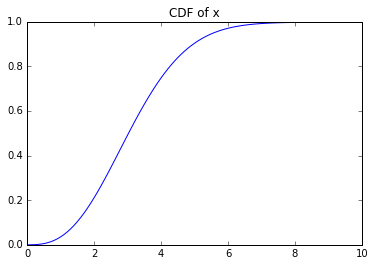

In [108]:
#3b

# Defining the PDF for x

def PDF2(x):
    # We obtain this formula after marginalizing out y from our original PDF
    f = 1/(2*np.sqrt(2*np.pi)) * x**2 * np.e**(-((x**2)/8))
    return f


plt.plot(x,PDF2(x))
plt.title("PDF of x")
plt.show()

# Calculating the CDF for x
# Furthermore we need to normalize with the same constant as we obtained after marginalization

CDF = (1/(8*np.sqrt(2*np.pi)))*np.cumsum(PDF2(x))

plt.plot(x,CDF)
plt.title("CDF of x")
plt.show()

In [109]:
#3c

print "The expectation value E(X) is: ", (np.mean(PDF2(x)))
print "The variance Var(X) is: ", (np.var(PDF2(x)))


The expectation value E(X) is:  0.199996525983
The variance Var(X) is:  0.0446298269797


# Random Numbers

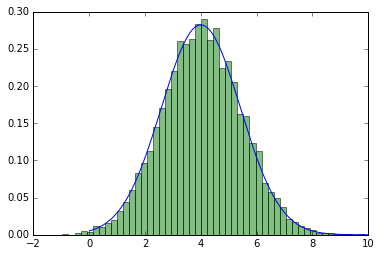

In [110]:
#1

# Generating 10000 random numbers with a mean of 4 and a sigma^2 of 2
r_numbers = np.random.normal(4, np.sqrt(2), 10000)

# Defining the Gaussian
def Gaussian(x, mu, sigma2):
    p = (1/(np.sqrt(2*np.pi*sigma2))) * (np.e**((-(x-mu)**2)/(2*sigma2)))
    return p
    

mu = 4
sigma2 = 2

# Plotting both the PDF as well as the histogram
x = np.linspace(0, 10, 1000)       
plt.plot(x,Gaussian(x,mu,sigma2)) 
plt.hist(r_numbers, bins = 50, normed = 1, alpha = 0.5)
plt.show()

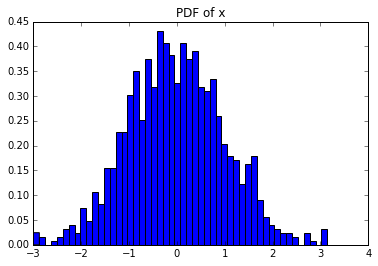

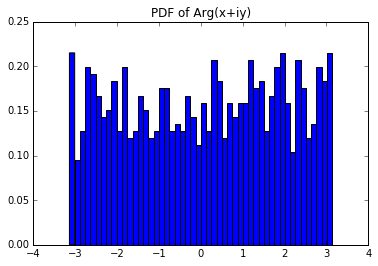

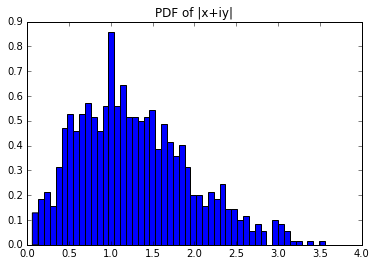

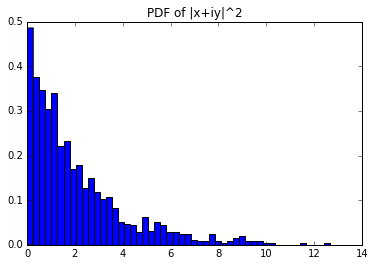

In [111]:
#2

# Generating 1000 independent values drawn from a normal distribution with a mean of 0 and a sigma^2 of 1
mu = 0
sigma = 1

X = np.random.normal(mu, sigma, 10000)
Y = np.random.normal(mu, sigma, 10000)

x = np.random.choice(X, 1000)
y = np.random.choice(Y, 1000)

a = x + 1j * y
b = np.angle(a)

c = np.absolute(a)

d = (np.absolute(a))**2

#print z

# Plotting both the PDF as well as the histogram
plt.hist(x, bins = 50, normed = 1)
plt.title("PDF of x")
plt.show()
plt.hist(b, bins = 50, normed = 1)
plt.title("PDF of Arg(x+iy)")
plt.show()
plt.hist(c, bins = 50, normed = 1)
plt.title("PDF of |x+iy|")
plt.show()
plt.hist(d, bins = 50, normed = 1)
plt.title("PDF of |x+iy|^2")
plt.show()

# Iteration

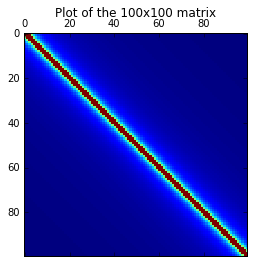

In [112]:
#1

# First we generate a 100x100 matrix filled with zeros
# In the for loop we give the value 1 to all elements on the diagonal and for all off-diagonal elements
# we have the value of 1/|i-j| 

M = np.zeros((100,100))
for x in range(100):
    for y in range(100):
        if x == y:
            M[x][y] = 1
        else:
            M[x][y] = 1/(np.abs(x-y))
            

plt.matshow(M)
plt.title("Plot of the 100x100 matrix")
plt.show()

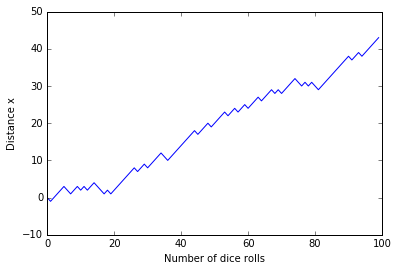

In [113]:
#2

# Generating 1000 dice throws 
dice = np.random.randint(1,7,100)

# Generate an array with 100 zeros 
x = np.zeros(100)

# We take 100 steps, if the dice throw is higher than 2, we take a step of 1 in the positive x direction
# If the dice throw is 2 or smaller, we take a step of 1 in the negative x direction
for i in range(99): 
    if dice[i] > 2:
        x[i+1] = x[i] + 1
    elif dice[i] <= 2:
        x[i+1] = x[i] - 1
        
plt.xlabel("Number of dice rolls")
plt.ylabel("Distance x")
plt.plot(x)
plt.show()
        

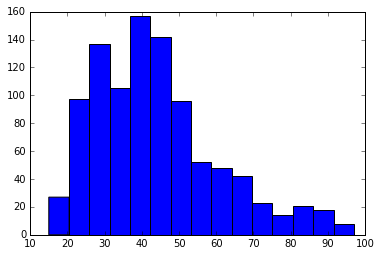

In [116]:
# We make an empty array to store the values for the number of dice rolls needed to get to x = 15

throws = []
# We do the loop 1000 times, to get 1000 values for our throws
for j in range(1000):
    # For each time we start at 0 and have new random values for our dice throws
    dice = np.random.randint(1,7,100)
    x = np.zeros(100)
    
    # Here we have the same loop as before, only we stop the loop once we arrive at x = 15 and save the number of throws
    for i in range(99):
        if x[i] > 14:
            throws.append(i)
            break
        if dice[i] > 2:
            x[i+1] = x[i] + 1
        elif dice[i] <= 2:
            x[i+1] = x[i] - 1
    
        
plt.hist(throws, bins = 15)
plt.show()